### KMeans Model

determine the number of clusters

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

from sklearn.cluster import KMeans

from sklearn import preprocessing
from sklearn.model_selection import train_test_split


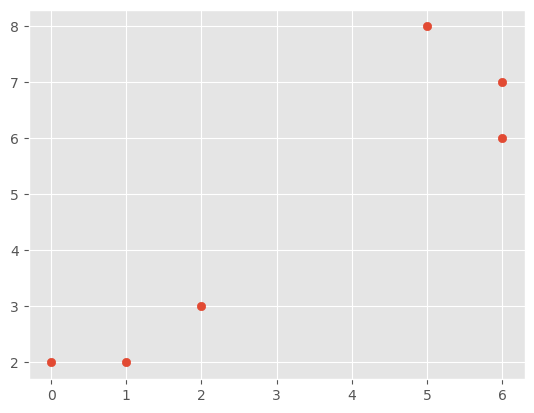

In [2]:
# Create some easy data
X = np.array([[1,2],[2,3],[0,2],[5,8],[6,6],[6,7]])

plt.scatter(X[:,0],X[:,1])
plt.show()


In [3]:
# Define the classifier
clf = KMeans(n_clusters=2)
clf.fit(X)


C:\Users\Christoph\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Christoph\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [4]:
centroids = clf.cluster_centers_
labels = clf.labels_


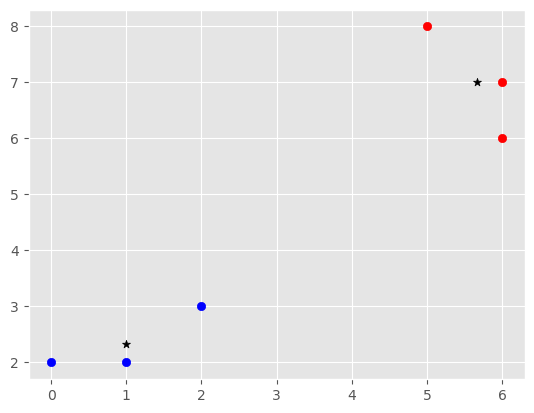

In [5]:
colors = ['b', 'r', 'g', 'c', 'o', 'k']

for i in range(len(X)):
    plt.scatter(X[i][0],X[i][1], c=colors[labels[i]])
    
plt.scatter(centroids[:,0],centroids[:,1], c='black', marker='*')
    
plt.show()


#### Example with dataset: https://www.kaggle.com/datasets/vinicius150987/titanic3

In [92]:
# Read the data
df = pd.read_excel('Data/titanic.xls')
df.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [93]:
df.drop(['body','name'], 1, inplace=True)
df.fillna(0, inplace=True)

# Convert non-numerical data into numerical data
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df


C:\Users\Christoph\AppData\Local\Temp\ipykernel_12300\2605815051.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['body','name'], 1, inplace=True)


In [94]:
df = handle_non_numerical_data(df)
df.head()


,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,0,29.0000,0,0,751,211.3375,57,2,1,54
1,1,1,1,0.9167,1,2,495,151.5500,49,2,14,294
2,1,0,0,2.0000,1,2,495,151.5500,49,2,0,294
3,1,0,1,30.0000,1,2,495,151.5500,49,2,0,294
4,1,0,0,25.0000,1,2,495,151.5500,49,2,0,294


In [95]:
# Separate into features and labels
X = np.array(df.drop(['survived'], 1).astype(float))

# Scale the features: the other results were not good
X = preprocessing.scale(X)

y = np.array(df['survived'])


C:\Users\Christoph\AppData\Local\Temp\ipykernel_12300\1695885436.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['survived'], 1).astype(float))


In [96]:
# Clustering algorithm
clf = KMeans(n_clusters=2)
clf.fit(X)


C:\Users\Christoph\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Christoph\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=2)

In [97]:
centroids = clf.cluster_centers_
labels = clf.labels_


In [98]:
correct = 0

for i in range(len(X)):
    if labels[i] == y[i]:
        correct+=1
        
print(correct/len(X))


0.7295645530939648
